In [1]:
import matplotlib.pyplot as plt
import numpy as np
import math
import skimage.filters as f
from skimage import exposure
import skimage.io as io
from scipy import fftpack as ff
from PIL import Image

In [2]:
def contrast(image):
    return np.max(image) - np.min(image)

def ScaleIntensity (image, K=1):
    m = contrast(image)
    out = np.array(image).astype(float)
    for j in range(image.shape[1]):
        for i in range(image.shape[0]):
            out[i][j] = K*(out[i][j]/m)
    return out

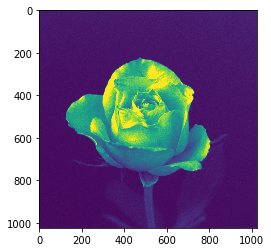

In [3]:
img = plt.imread("images/rose1024.tif")
imgOut = ScaleIntensity(img, 1) 
plt.imshow(imgOut)

In [4]:
imgDFT = ff.fft2(imgOut)
imgIDFT = ff.ifft2(imgDFT)

In [5]:
real = np.real(imgIDFT)
diff = np.subtract(imgIDFT, real)
mx = np.max(diff)
mn =  np.min(diff)
print(mx)
print(mn)

2.744411915570428e-16j
-2.4218046868574426e-16j


In [42]:
def Spectrum(img):
    out = np.asarray(img).astype(float)
    out = ScaleIntensity(out)
    imgDFT = ff.fft2(out)
    S = np.log(np.add(np.abs(imgDFT),1))
    Fc = ff.fftshift(S)
    return ScaleIntensity(Fc)

In [50]:
def Angle(img):
    out = np.asarray(img).astype(float)
    out = ScaleIntensity(out)
    imgDFT = ff.fft2(out)
    return np.angle(imgDFT)

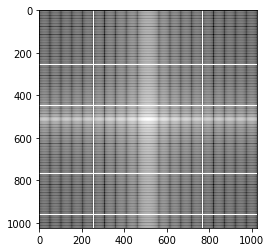

In [45]:
imgCenter = np.zeros((1024,1024))
for i in range (20):
    for j in range(80):
        imgCenter[j+472][i+502] = 1.0
plt.gray()
imgCenterSpectrum = Spectrum(imgCenter)
plt.imshow(imgEqualized, cmap='gray')

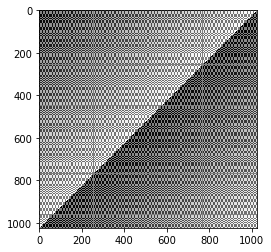

In [51]:
imgCenterAngle = Angle(imgCenter)
imgCenterAngle = exposure.rescale_intensity(imgCenterAngle)
plt.imshow(imgCenterAngle)

In [ ]:
imgRight = plt.imread("images/RightRectangle.png")
imgRightSpectrum = Spectrum(imgRight)
plt.imshow(imgRightSpectrum)

In [ ]:
imgRightAngle = Angle(imgRight)
plt.imshow(imgRightAngle)

In [ ]:
imgRotated = plt.imread("images/RotateRectangle.png")
imgRotatedSpectrum = Spectrum(imgRotated)
plt.imshow(imgRotatedSpectrum)

In [ ]:
imgRotatedAngle = Angle(imgRotated)
plt.imshow(imgRotatedAngle)

In [ ]:
imgBoy = plt.imread('images/boy.tif')
plt.imshow(imgBoy)

In [ ]:
imgBoyAngle = Angle(imgBoy)
plt.imshow(imgBoyAngle)

In [ ]:
imgBoyAngleReconstruct = ff.ifft2(imgBoyAngle)

In [ ]:
imgDIP = plt.imread("images/DFT.png")
plt.imshow(imgDIP)

In [ ]:
imgA = np.multiply()